In [1]:
from requests import HTTPError
from xnoapi.vn.data import Quote #Lấy dữ liệu
from xnoapi.vn.data import client #Nhập API key
import pandas as pd
import matplotlib.pyplot as plt
from xnoapi.vn.data.stocks import Company, Finance
while True:
    symbol = input('Hãy nhập mã cổ phiếu (VD: VCB, VIC,...): ') # Yêu cầu nhập mã cổ phiếu
    comp = Company(symbol) #Lấy thông tin công ty
    fin = Finance(symbol) #Lấy thông tin tài chính
    print(f'Company overview {symbol}:')
    try:
        overview = comp.overview() # Lấy overview ra
        print(overview[['exchange', 'industry', 'stockRating', 'noEmployees']].iloc[0]) #in ra
        print(f'Company profile {symbol}:')
        profile = comp.profile()
        # Profile thường chứa HTML, chỉ hiển thị thông tin cơ bản
        if not profile.empty: 
            print(f"Company name: {profile['companyName'].iloc[0]}")
        break
    except HTTPError: #Lỗi khi không tìm thấy mã cổ phiếu
        print("Mã cổ phiếu không tồn tại. Hãy nhập lại.")
        continue

Company overview VIC:
exchange               HOSE
industry       Bất động sản
stockRating             2.4
noEmployees             303
Name: 0, dtype: object
Company profile VIC:
Company name: Tập đoàn Vingroup - Công ty CP


In [2]:
# PHẦN 2
# Lấy dữ liệu
q = Quote(symbol)  # Lấy dữ liệu cổ phiếu
data = q.history(start='2025-01-01',end='2025-11-09', interval='1D') # Lấy dữ liệu từ đầu năm 2025
# Lọc dữ liệu
ft_data = data.query("volume > 1000000") #Truy vấn những dữ liệu lớn hơn 1000000 ở volume
if ft_data.empty: #Nếu dữ liệu trống
    print('Không Có Ngày Nào Khối Lượng Vượt Quá 1000000')
else:
    ft_data.to_csv('du_lieu_co_phieu.csv') # Lưu file CSV
    print('Có ngày có khối lượng vượt qá 1000000')
    print(ft_data)
    print('Dữ liệu đã lưu vào CSV ✅')
# Tóm tắt dữ liệu
print('TÓM TẮT DỮ LIỆU')
print('Số dòng số liệu:',len(data))
print('Giá đóng cửa trung bình:',data['close'].mean())
print('Giá đóng cửa cao nhất:',data['close'].max())
print('Giá đóng cửa thấp nhất:',data['close'].min())

Có ngày có khối lượng vượt qá 1000000
          time      open      high       low     close    volume
0   2025-01-02  24014.03  24062.74  23673.06  23721.77   7837356
1   2025-01-03  23721.77  23721.77  22991.12  22991.12  17431953
2   2025-01-06  22991.12  23234.67  22893.70  22991.12   8135904
3   2025-01-07  23283.38  23283.38  22942.41  23039.83   7617413
4   2025-01-08  23185.96  23673.06  23039.83  23332.09  11949407
..         ...       ...       ...       ...       ...       ...
206 2025-11-03  35100.00  35500.00  33600.00  33600.00  16737200
207 2025-11-04  33600.00  35200.00  33450.00  35000.00  16062100
208 2025-11-05  34900.00  34900.00  34050.00  34100.00  11242500
209 2025-11-06  34150.00  34500.00  33500.00  33600.00  13684100
210 2025-11-07  33600.00  33950.00  33000.00  33000.00  16083600

[211 rows x 6 columns]
Dữ liệu đã lưu vào CSV ✅
TÓM TẮT DỮ LIỆU
Số dòng số liệu: 211
Giá đóng cửa trung bình: 31147.23526066351
Giá đóng cửa cao nhất: 41300.0
Giá đóng cửa thấp nhất

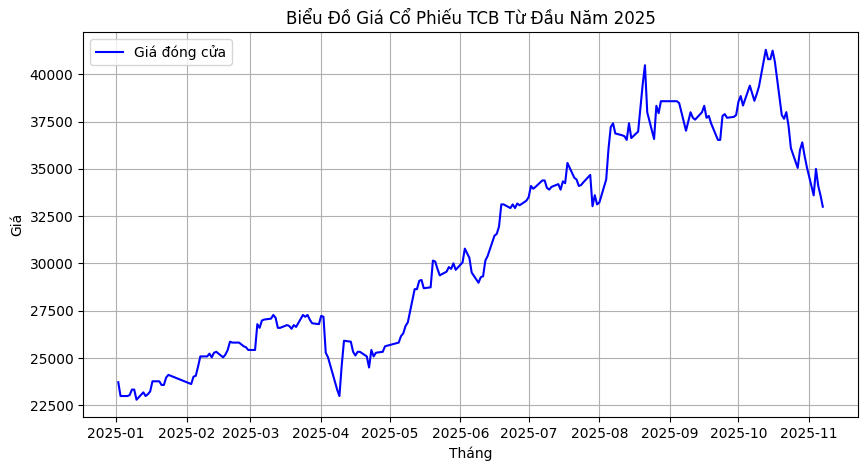

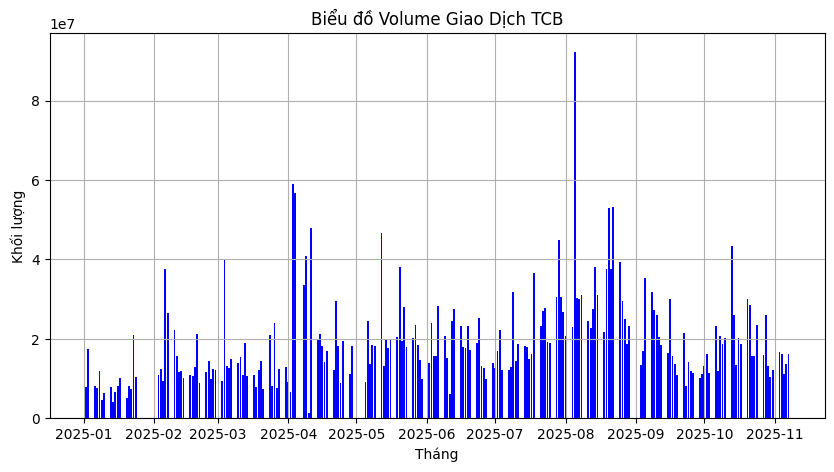

In [3]:
#Phần 3
#Vẽ biểu đồ đường
plt.figure(figsize=(10,5)) # kích thước biểu đồ
plt.plot(data.time, data['close'], label='Giá đóng cửa', color='blue')
plt.title(f"Biểu Đồ Giá Cổ Phiếu {symbol} Từ Đầu Năm 2025")  #Đặt tiêu đề cho linegraph
plt.xlabel('Tháng') #Đánh dấu trục hoành
plt.ylabel('Giá') #Đánh dấu trục tung
plt.grid(True) #Thêm grid
plt.legend() #Thêm chú thích
plt.savefig('bieu_do_gia.png') # Lưu biểu đồ thành file .png
plt.show() #Hiện thị biểu đồ
#Vẽ biểu đồ cột cho volume giao dịch
plt.figure(figsize=(10,5)) #Kích thước biểu đồ
plt.bar(data.time,data['volume'], color='blue') # Chọn dữ liệu cho trục tung, màu cho cột
plt.title(f"Biểu đồ Volume Giao Dịch {symbol}") # Đặt tên cho biểu đồ cột
plt.xlabel("Tháng") # Đánh dấu trục hoành
plt.ylabel("Khối lượng") # Đánh dấu trục tung
plt.grid(True) #Thêm grid
plt.savefig('bieu_do_volume.png') #Lưu biểu đồ thành file .png
plt.show() #Hiện thị biểu đồ

